In [4]:
from google.colab import drive 
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Colab Notebooks/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

In [16]:
#Filtering the data to get the desired range
#Grouping the data using hourly timestamp and forward filling the NULL values

import datetime, pytz

def dateparse (time_in_secs):    
    return pytz.utc.localize(datetime.datetime.fromtimestamp(float(time_in_secs)))

data = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv',parse_dates=[0], date_parser=dateparse) 
data['Timestamp'] = data['Timestamp'].dt.tz_localize(None)
drop_row = data[ (data['Timestamp'] >= '2020-06-01 00:00:00') ].index
data.drop(drop_row, inplace = True)
drop_row = data[ (data['Timestamp'] < '2017-05-01 00:00:00')].index
data.drop(drop_row, inplace = True)



data = data.groupby([pd.Grouper(key='Timestamp', freq='H')]).first().reset_index()
data = data.set_index('Timestamp')
data = data[['Weighted_Price']]
data['Weighted_Price'].fillna(method='ffill', inplace=True)
data.head()
X1 = np.array(data.index)
X2 = np.array(data.iloc[:,0])
X1=X1.reshape(-1,1)
X2=X2.reshape(-1,1)

print(X1)
print(X2)
  


[['2017-05-01T00:00:00.000000000']
 ['2017-05-01T01:00:00.000000000']
 ['2017-05-01T02:00:00.000000000']
 ...
 ['2020-05-31T21:00:00.000000000']
 ['2020-05-31T22:00:00.000000000']
 ['2020-05-31T23:00:00.000000000']]
[[1351.8682027]
 [1355.014177 ]
 [1346.1726585]
 ...
 [9505.9267055]
 [9463.5418988]
 [9449.1254477]]


In [12]:

from sklearn.model_selection import train_test_split
input_vec_train,input_vec_test,output_label_y_train,output_label_y_test = train_test_split(X1,X2,test_size=0.1,random_state=0)
# print(input_vec_train)
# print(input_vec_test)
# print(output_label_y_train)
# print(output_label_y_test)

[[2738.8270443]
 [8981.13797  ]
 [6307.2896074]
 ...
 [6567.7624556]
 [8331.0964968]
 [4093.5609879]]
[[ 7343.4134753]
 [ 2701.2536932]
 [13548.79797  ]
 ...
 [ 9009.6156951]
 [ 9698.6520567]
 [ 9686.2094606]]


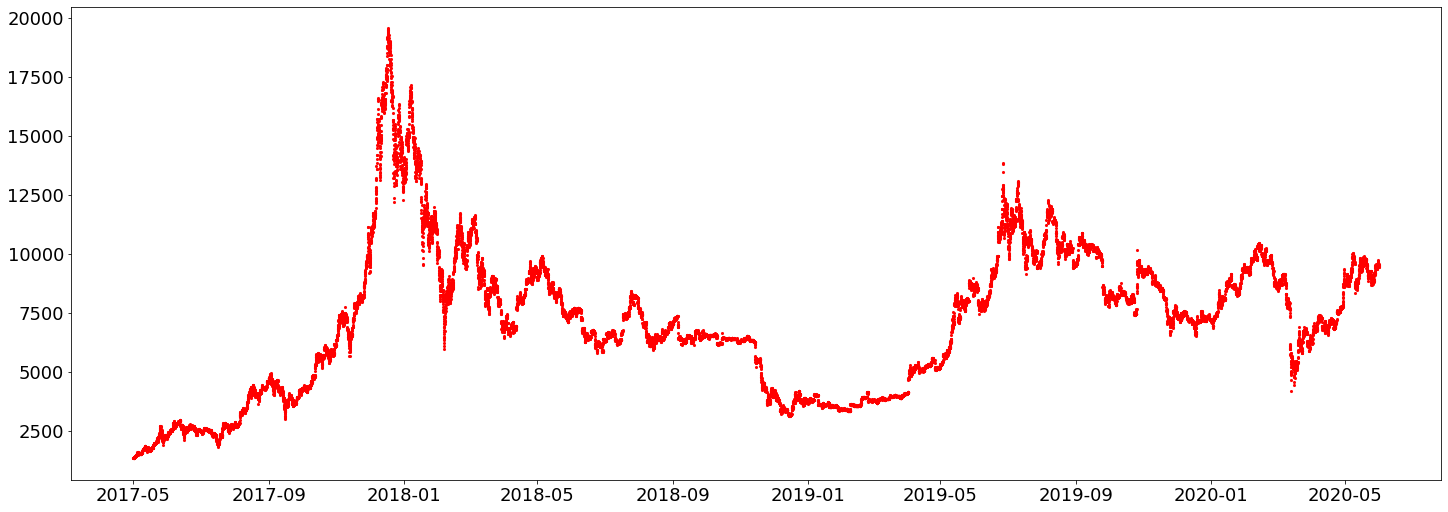

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[20, 7])
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(input_vec_train, output_label_y_train, color='red', marker='.', linewidth=0.1)

[[ 7398.80961037]
 [ 2712.96507431]
 [13501.24625243]
 ...
 [ 8811.77472964]
 [ 9694.66140187]
 [ 9600.57095559]]
RMSE value of the KNN Model is: 86.50215652919563
MAPE value of the KNN Model is: 0.6161014989450473


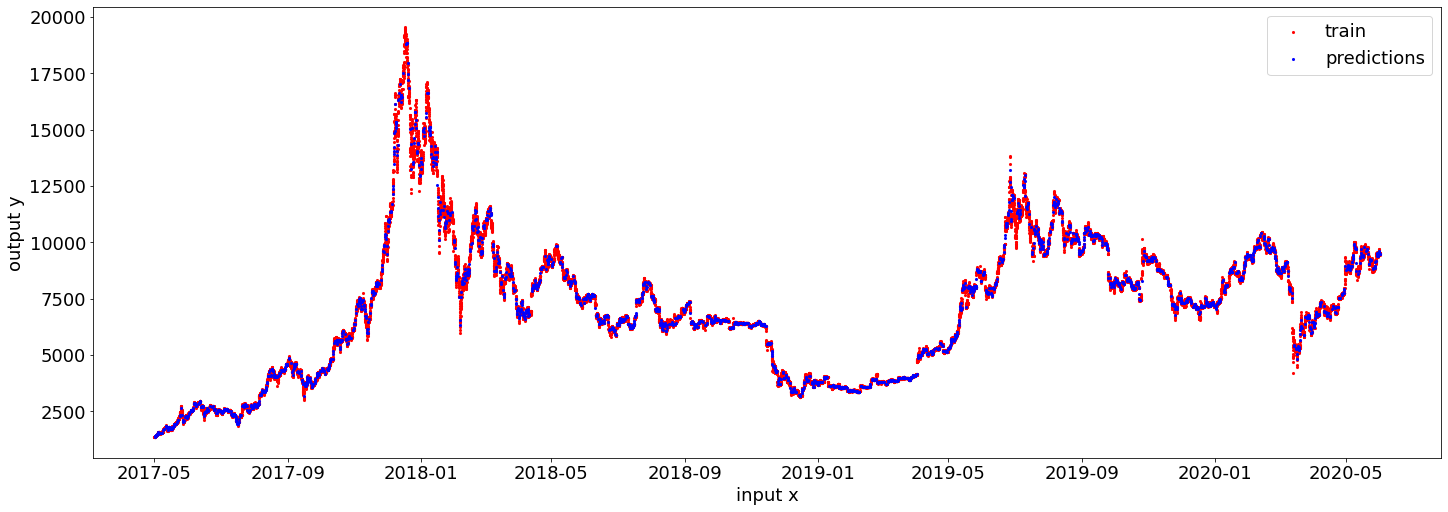

In [53]:
#Using KNN with uniform weight
from math import sqrt
from sklearn import metrics


fig = plt.figure(figsize=[20, 7])
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True

from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=7).fit(input_vec_train, output_label_y_train)
ypred = model.predict(input_vec_test)
print(ypred)
RMSE = sqrt(metrics.mean_squared_error( output_label_y_test, ypred)) 
print('RMSE value of the KNN Model is:', RMSE)


MAPE = np.mean(np.abs((output_label_y_test - ypred)/output_label_y_test))*100
print('MAPE value of the KNN Model is:', MAPE)


import matplotlib.pyplot as plt
plt.rc('font', size=18); plt.rcParams['figure.constrained_layout.use'] = True
plt.scatter(input_vec_train, output_label_y_train, color='red', marker='.', linewidth=0.1)
plt.scatter(input_vec_test, ypred, color='blue', marker='.', linewidth=0.1)
plt.xlabel("input x"); plt.ylabel("output y")
plt.legend(['train','predictions'])
plt.show()